Wall time: 36.2 s


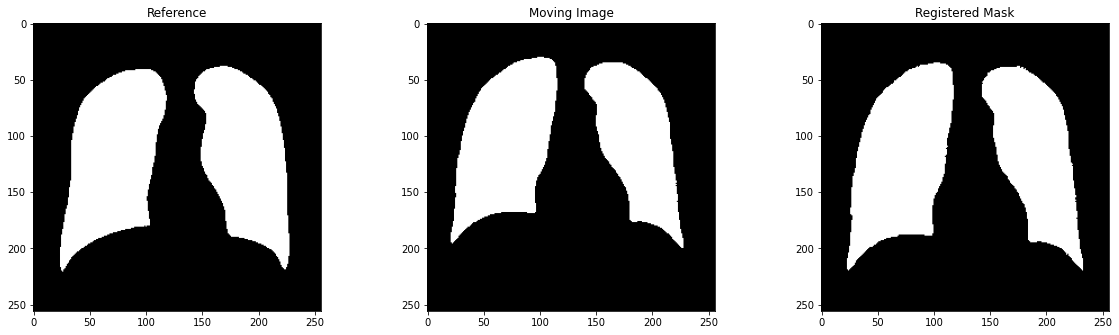

In [18]:
%%time
import SimpleITK as sitk
from matplotlib import pyplot as plt
from PIL import Image
import cv2



ref_path = './Reference/Reference_Mask.png'
path = './Masks/test_file_1_Mask.png'
path2 = './Masks_Registered_with_SimpleElastix/test_file_1_Mask.png'
fixedImage = sitk.ReadImage(ref_path)
movingImage = sitk.ReadImage(path)
parameterMap = sitk.GetDefaultParameterMap('affine')

elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)
elastixImageFilter.SetParameterMap(parameterMap)
elastixImageFilter.Execute()
resultImage = elastixImageFilter.GetResultImage()

#sitk.WriteImage(resultImage, 'result.png')

transformParameterMap = elastixImageFilter.GetTransformParameterMap()

res = sitk.GetArrayFromImage(resultImage)
    
reference = sitk.GetArrayFromImage(fixedImage)  
target = sitk.GetArrayFromImage(movingImage)  

ret, res = cv2.threshold(res, 120, 255, cv2.THRESH_BINARY)

    
plt.figure(figsize=(20, 18))
plt.subplot(3, 3, 1)
plt.title('Reference')
plt.imshow(reference, cmap='gray')
plt.subplot(3, 3, 2)
plt.title('Moving Image')
plt.imshow(target, cmap='gray')
plt.subplot(3, 3, 3)
plt.title('Registered Mask')
plt.imshow(res, cmap='gray')
result = Image.fromarray(res)
result.convert('P').save(path2.replace('.png','_SimpleElastix.png'), 'PNG')

### Intersection / union to check if SimpleElastix is as accurate as PyElastix

In [22]:
import numpy as np
pyEl_path = './Registered_Masks/test_file_1_Mask_AFFINE.png'
simpEl_path = './Masks_Registered_with_SimpleElastix/test_file_1_Mask_SimpleElastix.png'
pyEl = np.asarray(Image.open(pyEl_path)).astype(float)
simpEl = np.asarray(Image.open(simpEl_path)).astype(float)

intersection = numpy.logical_and(pyEl, simpEl)
union = numpy.logical_or(pyEl, simpEl)
iou_score = numpy.sum(intersection) / numpy.sum(union)
print('IoU = %s' % iou_score)


IoU = 0.9704452654092942


In [23]:
def IoU(img1, img2):
    intersection = numpy.logical_and(img1, img2)
    union = numpy.logical_or(img1, img2)
    iou_score = numpy.sum(intersection) / numpy.sum(union)
    return iou_score
    